In [69]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [70]:
os.chdir('C:\GreatLearning\Project')

In [71]:
Data = pd.read_excel("Sports Data.xlsx", sheet_name = 'Sports data for DSBA')

In [72]:
Data.head()

,Game_number,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,...,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
0,Game_1,Loss,18.0,Day,ODI,3.0,1,3.0,Bowling,Srilanka,...,13.0,3,0.0,2,3.0,6.0,0,54.0,3,1
1,Game_2,Win,24.0,Day,T20,3.0,1,4.0,Batting,Zimbabwe,...,12.0,1,0.0,0,3.0,6.0,0,69.0,2,1
2,Game_3,Loss,24.0,Day and Night,T20,3.0,1,2.0,Bowling,Zimbabwe,...,14.0,4,0.0,0,3.0,6.0,0,69.0,3,1
3,Game_4,Win,24.0,NaN,ODI,2.0,1,2.0,Bowling,Kenya,...,15.0,4,0.0,2,3.0,6.0,0,73.0,3,1
4,Game_5,Loss,24.0,Night,ODI,1.0,1,3.0,Bowling,Srilanka,...,12.0,4,0.0,0,3.0,6.0,0,80.0,3,1


In [73]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Game_number             2930 non-null   object 
 1   Result                  2930 non-null   object 
 2   Avg_team_Age            2833 non-null   float64
 3   Match_light_type        2878 non-null   object 
 4   Match_format            2860 non-null   object 
 5   Bowlers_in_team         2848 non-null   float64
 6   Wicket_keeper_in_team   2930 non-null   int64  
 7   All_rounder_in_team     2890 non-null   float64
 8   First_selection         2871 non-null   object 
 9   Opponent                2894 non-null   object 
 10  Season                  2868 non-null   object 
 11  Audience_number         2849 non-null   float64
 12  Offshore                2866 non-null   object 
 13  Max_run_scored_1over    2902 non-null   float64
 14  Max_wicket_taken_1over  2930 non-null   

In [74]:
Data.shape

(2930, 23)

In [75]:
Data['Wicket_keeper_in_team'].value_counts()

1    2930
Name: Wicket_keeper_in_team, dtype: int64

Dropping Unwanted Variables

In [76]:
Data.drop(['Game_number','Wicket_keeper_in_team'], axis = 1, inplace = True)

In [77]:
cat=[]
num=[]
for i in Data.columns:
    if Data[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['Result', 'Match_light_type', 'Match_format', 'First_selection', 'Opponent', 'Season', 'Offshore', 'Players_scored_zero', 'player_highest_wicket']
['Avg_team_Age', 'Bowlers_in_team', 'All_rounder_in_team', 'Audience_number', 'Max_run_scored_1over', 'Max_wicket_taken_1over', 'Extra_bowls_bowled', 'Min_run_given_1over', 'Min_run_scored_1over', 'Max_run_given_1over', 'extra_bowls_opponent', 'player_highest_run']


In [78]:
Data['Result'].value_counts()

Win     2457
Loss     473
Name: Result, dtype: int64

In [79]:
Data['Match_light_type'].value_counts()

Day              2041
Day and Night     541
Night             296
Name: Match_light_type, dtype: int64

In [80]:
Data['Match_format'].value_counts()

ODI      1865
T20       864
Test      125
20-20       6
Name: Match_format, dtype: int64

In [81]:
# 6 matches labelled as '20-20' replaced with'T20

Data['Match_format'] = Data['Match_format'].replace(['20-20'],['T20'])
Data['Match_format'].value_counts()

ODI     1865
T20      870
Test     125
Name: Match_format, dtype: int64

In [82]:
Data['First_selection'].value_counts()

Bowling    1722
Batting    1138
Bat          11
Name: First_selection, dtype: int64

In [83]:
Data['First_selection'] = Data['First_selection'].replace(['Bat'],['Batting'])
Data['First_selection'].value_counts()

Bowling    1722
Batting    1149
Name: First_selection, dtype: int64

In [84]:
Data['Opponent'].value_counts()

South Africa    640
Kenya           576
Srilanka        513
England         283
Pakistan        253
Bangladesh      204
Zimbabwe        163
West Indies     158
Australia       104
Name: Opponent, dtype: int64

In [85]:
Data['Season'].value_counts()

Rainy     1309
Summer     918
Winter     641
Name: Season, dtype: int64

In [86]:
Data['Offshore'].value_counts()

No     2057
Yes     809
Name: Offshore, dtype: int64

In [87]:
Data['Players_scored_zero'].value_counts()

3        1730
2         744
4         285
1         166
Three       5
Name: Players_scored_zero, dtype: int64

In [88]:
Data['player_highest_wicket'].value_counts()

1        1084
2        1063
3         427
4         211
5         138
Three       7
Name: player_highest_wicket, dtype: int64

In [89]:
Data['Players_scored_zero']=Data['Players_scored_zero'].replace('Three',3)
Data['player_highest_wicket']=Data['player_highest_wicket'].replace('Three',3)
Data["Players_scored_zero"]= Data["Players_scored_zero"].astype("int64")
Data["player_highest_wicket"]= Data["player_highest_wicket"].astype("int64")

In [90]:
Data['Players_scored_zero'].value_counts()

3    1735
2     744
4     285
1     166
Name: Players_scored_zero, dtype: int64

In [91]:
Data['player_highest_wicket'].value_counts()

1    1084
2    1063
3     434
4     211
5     138
Name: player_highest_wicket, dtype: int64

# Data Description

In [92]:
Data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Result,2930,2,Win,2457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avg_team_Age,2833.0,NaN,NaN,NaN,29.242852,2.26423,12.0,30.0,30.0,30.0,70.0
Match_light_type,2878,3,Day,2041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Match_format,2860,3,ODI,1865,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bowlers_in_team,2848.0,NaN,NaN,NaN,2.913624,1.023907,1.0,2.0,3.0,4.0,5.0
All_rounder_in_team,2890.0,NaN,NaN,NaN,2.722491,1.092699,1.0,2.0,3.0,4.0,4.0
First_selection,2871,2,Bowling,1722,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Opponent,2894,9,South Africa,640,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Season,2868,3,Rainy,1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Audience_number,2849.0,NaN,NaN,NaN,46267.960688,48599.581459,7063.0,20363.0,34349.0,57876.0,1399930.0


# Missing Values

In [93]:
Data.isnull().sum()

Result                     0
Avg_team_Age              97
Match_light_type          52
Match_format              70
Bowlers_in_team           82
All_rounder_in_team       40
First_selection           59
Opponent                  36
Season                    62
Audience_number           81
Offshore                  64
Max_run_scored_1over      28
Max_wicket_taken_1over     0
Extra_bowls_bowled        29
Min_run_given_1over        0
Min_run_scored_1over      27
Max_run_given_1over       34
extra_bowls_opponent       0
player_highest_run        28
Players_scored_zero        0
player_highest_wicket      0
dtype: int64

# Exploratory data analysis

## Univariate Analysis

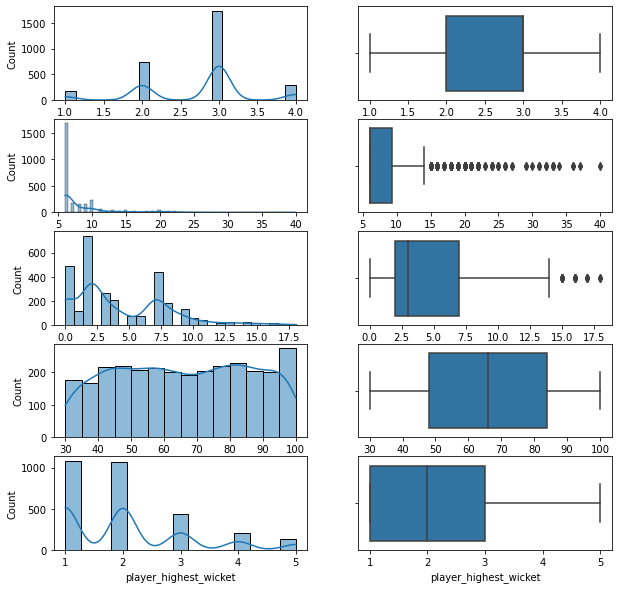

In [94]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(10, 10)

sns.histplot(Data['Players_scored_zero'] , kde= True, ax=axes[0][0])
sns.boxplot(Data['Players_scored_zero'] , data = Data, ax=axes[0][1])

sns.histplot(Data['Max_run_given_1over'] ,kde= True, ax=axes[1][0])
sns.boxplot(Data['Max_run_given_1over'] , data = Data, ax=axes[1][1])

sns.histplot(Data['extra_bowls_opponent'] ,kde= True, ax=axes[2][0])
sns.boxplot(Data['extra_bowls_opponent'] , data = Data, ax=axes[2][1])

sns.histplot(Data['player_highest_run'], kde= True, ax=axes[3][0])
sns.boxplot(Data['player_highest_run'] , data = Data, ax=axes[3][1])

sns.histplot(Data['player_highest_wicket'], kde= True, ax=axes[4][0])
sns.boxplot(Data['player_highest_wicket'] , data = Data, ax=axes[4][1])

plt.show()

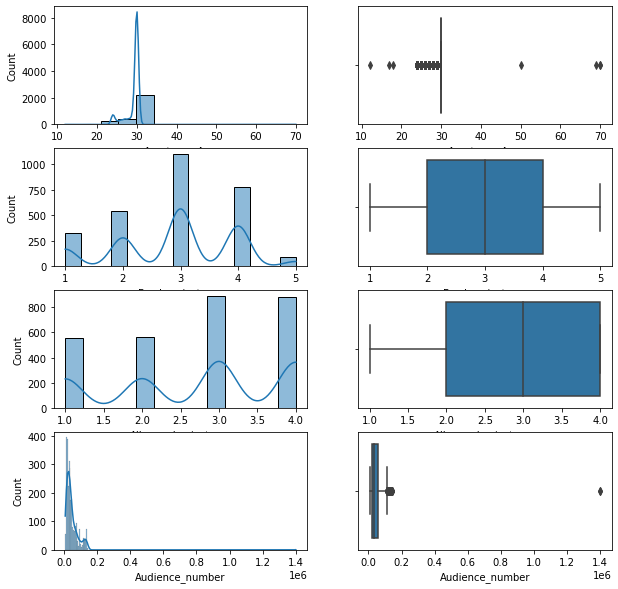

In [95]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10, 10)

sns.histplot(Data['Avg_team_Age'] , kde= True, ax=axes[0][0])
sns.boxplot(Data['Avg_team_Age'] , data = Data, ax=axes[0][1])

sns.histplot(Data['Bowlers_in_team'] ,kde= True, ax=axes[1][0])
sns.boxplot(Data['Bowlers_in_team'] , data = Data, ax=axes[1][1])

sns.histplot(Data['All_rounder_in_team'] ,kde= True, ax=axes[2][0])
sns.boxplot(Data['All_rounder_in_team'] , data = Data, ax=axes[2][1])

sns.histplot(Data['Audience_number'], kde= True, ax=axes[3][0])
sns.boxplot(Data['Audience_number'] , data = Data, ax=axes[3][1])

plt.show()

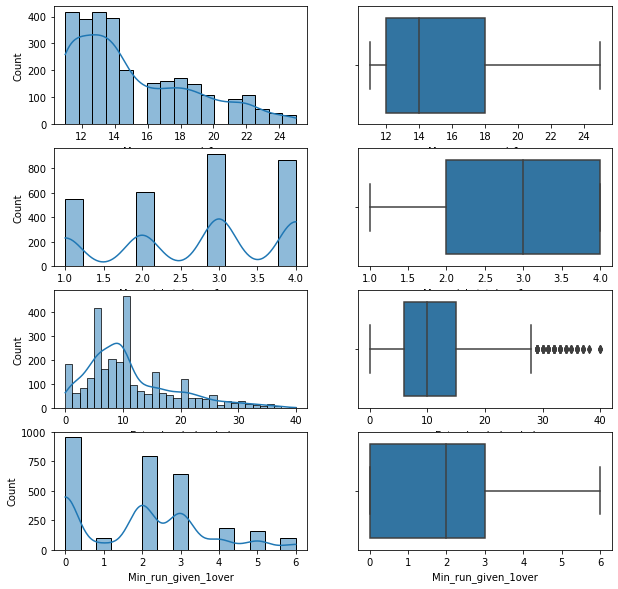

In [96]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10, 10)

sns.histplot(Data['Max_run_scored_1over'] , kde= True, ax=axes[0][0])
sns.boxplot(Data['Max_run_scored_1over'] , data = Data, ax=axes[0][1])

sns.histplot(Data['Max_wicket_taken_1over'] ,kde= True, ax=axes[1][0])
sns.boxplot(Data['Max_wicket_taken_1over'] , data = Data, ax=axes[1][1])

sns.histplot(Data['Extra_bowls_bowled'] ,kde= True, ax=axes[2][0])
sns.boxplot(Data['Extra_bowls_bowled'] , data = Data, ax=axes[2][1])

sns.histplot(Data['Min_run_given_1over'], kde= True, ax=axes[3][0])
sns.boxplot(Data['Min_run_given_1over'] , data = Data, ax=axes[3][1])

plt.show()

###  Bivariate and Multivariate Analysis

In [97]:
print(num)

['Avg_team_Age', 'Bowlers_in_team', 'All_rounder_in_team', 'Audience_number', 'Max_run_scored_1over', 'Max_wicket_taken_1over', 'Extra_bowls_bowled', 'Min_run_given_1over', 'Min_run_scored_1over', 'Max_run_given_1over', 'extra_bowls_opponent', 'player_highest_run']


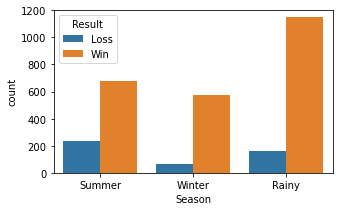

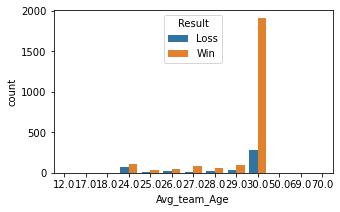

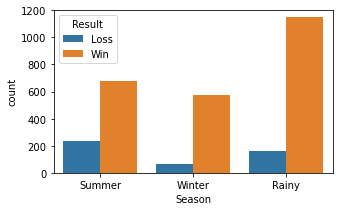

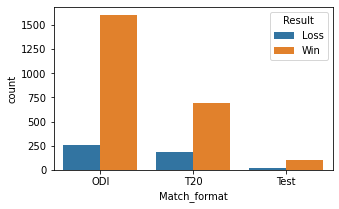

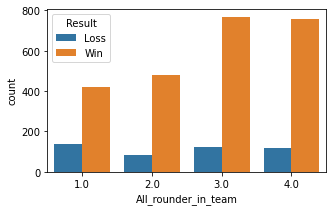

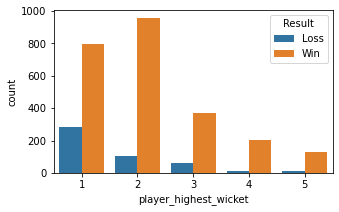

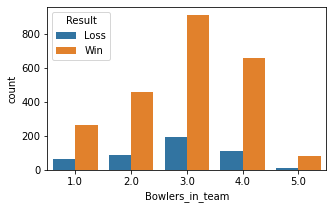

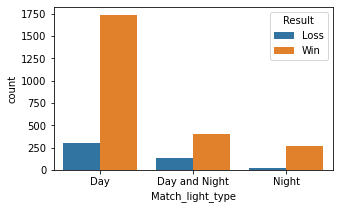

In [98]:
col=['Season','Avg_team_Age','Season','Match_format','All_rounder_in_team','player_highest_wicket','Bowlers_in_team',
      'Match_light_type']

for i in col:
    plt.figure(figsize=(5,3))
    sns.countplot(x=Data[i],hue=Data['Result'])
    plt.show()

### Correlation Plot

<AxesSubplot:>

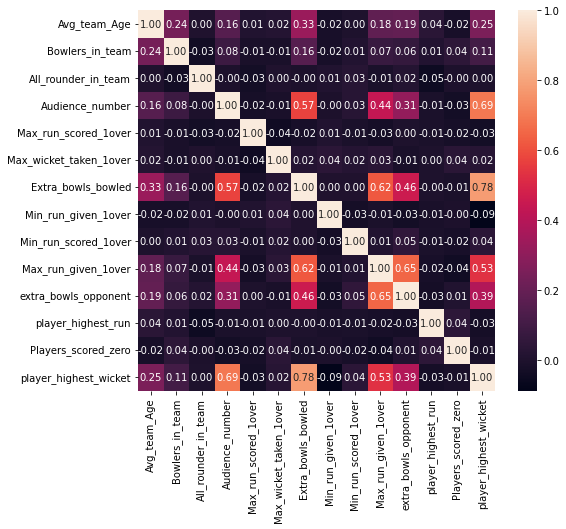

In [99]:
plt.figure(figsize=(8,7))
sns.heatmap(Data.corr(), annot=True, fmt='.2f')

<Figure size 720x576 with 0 Axes>

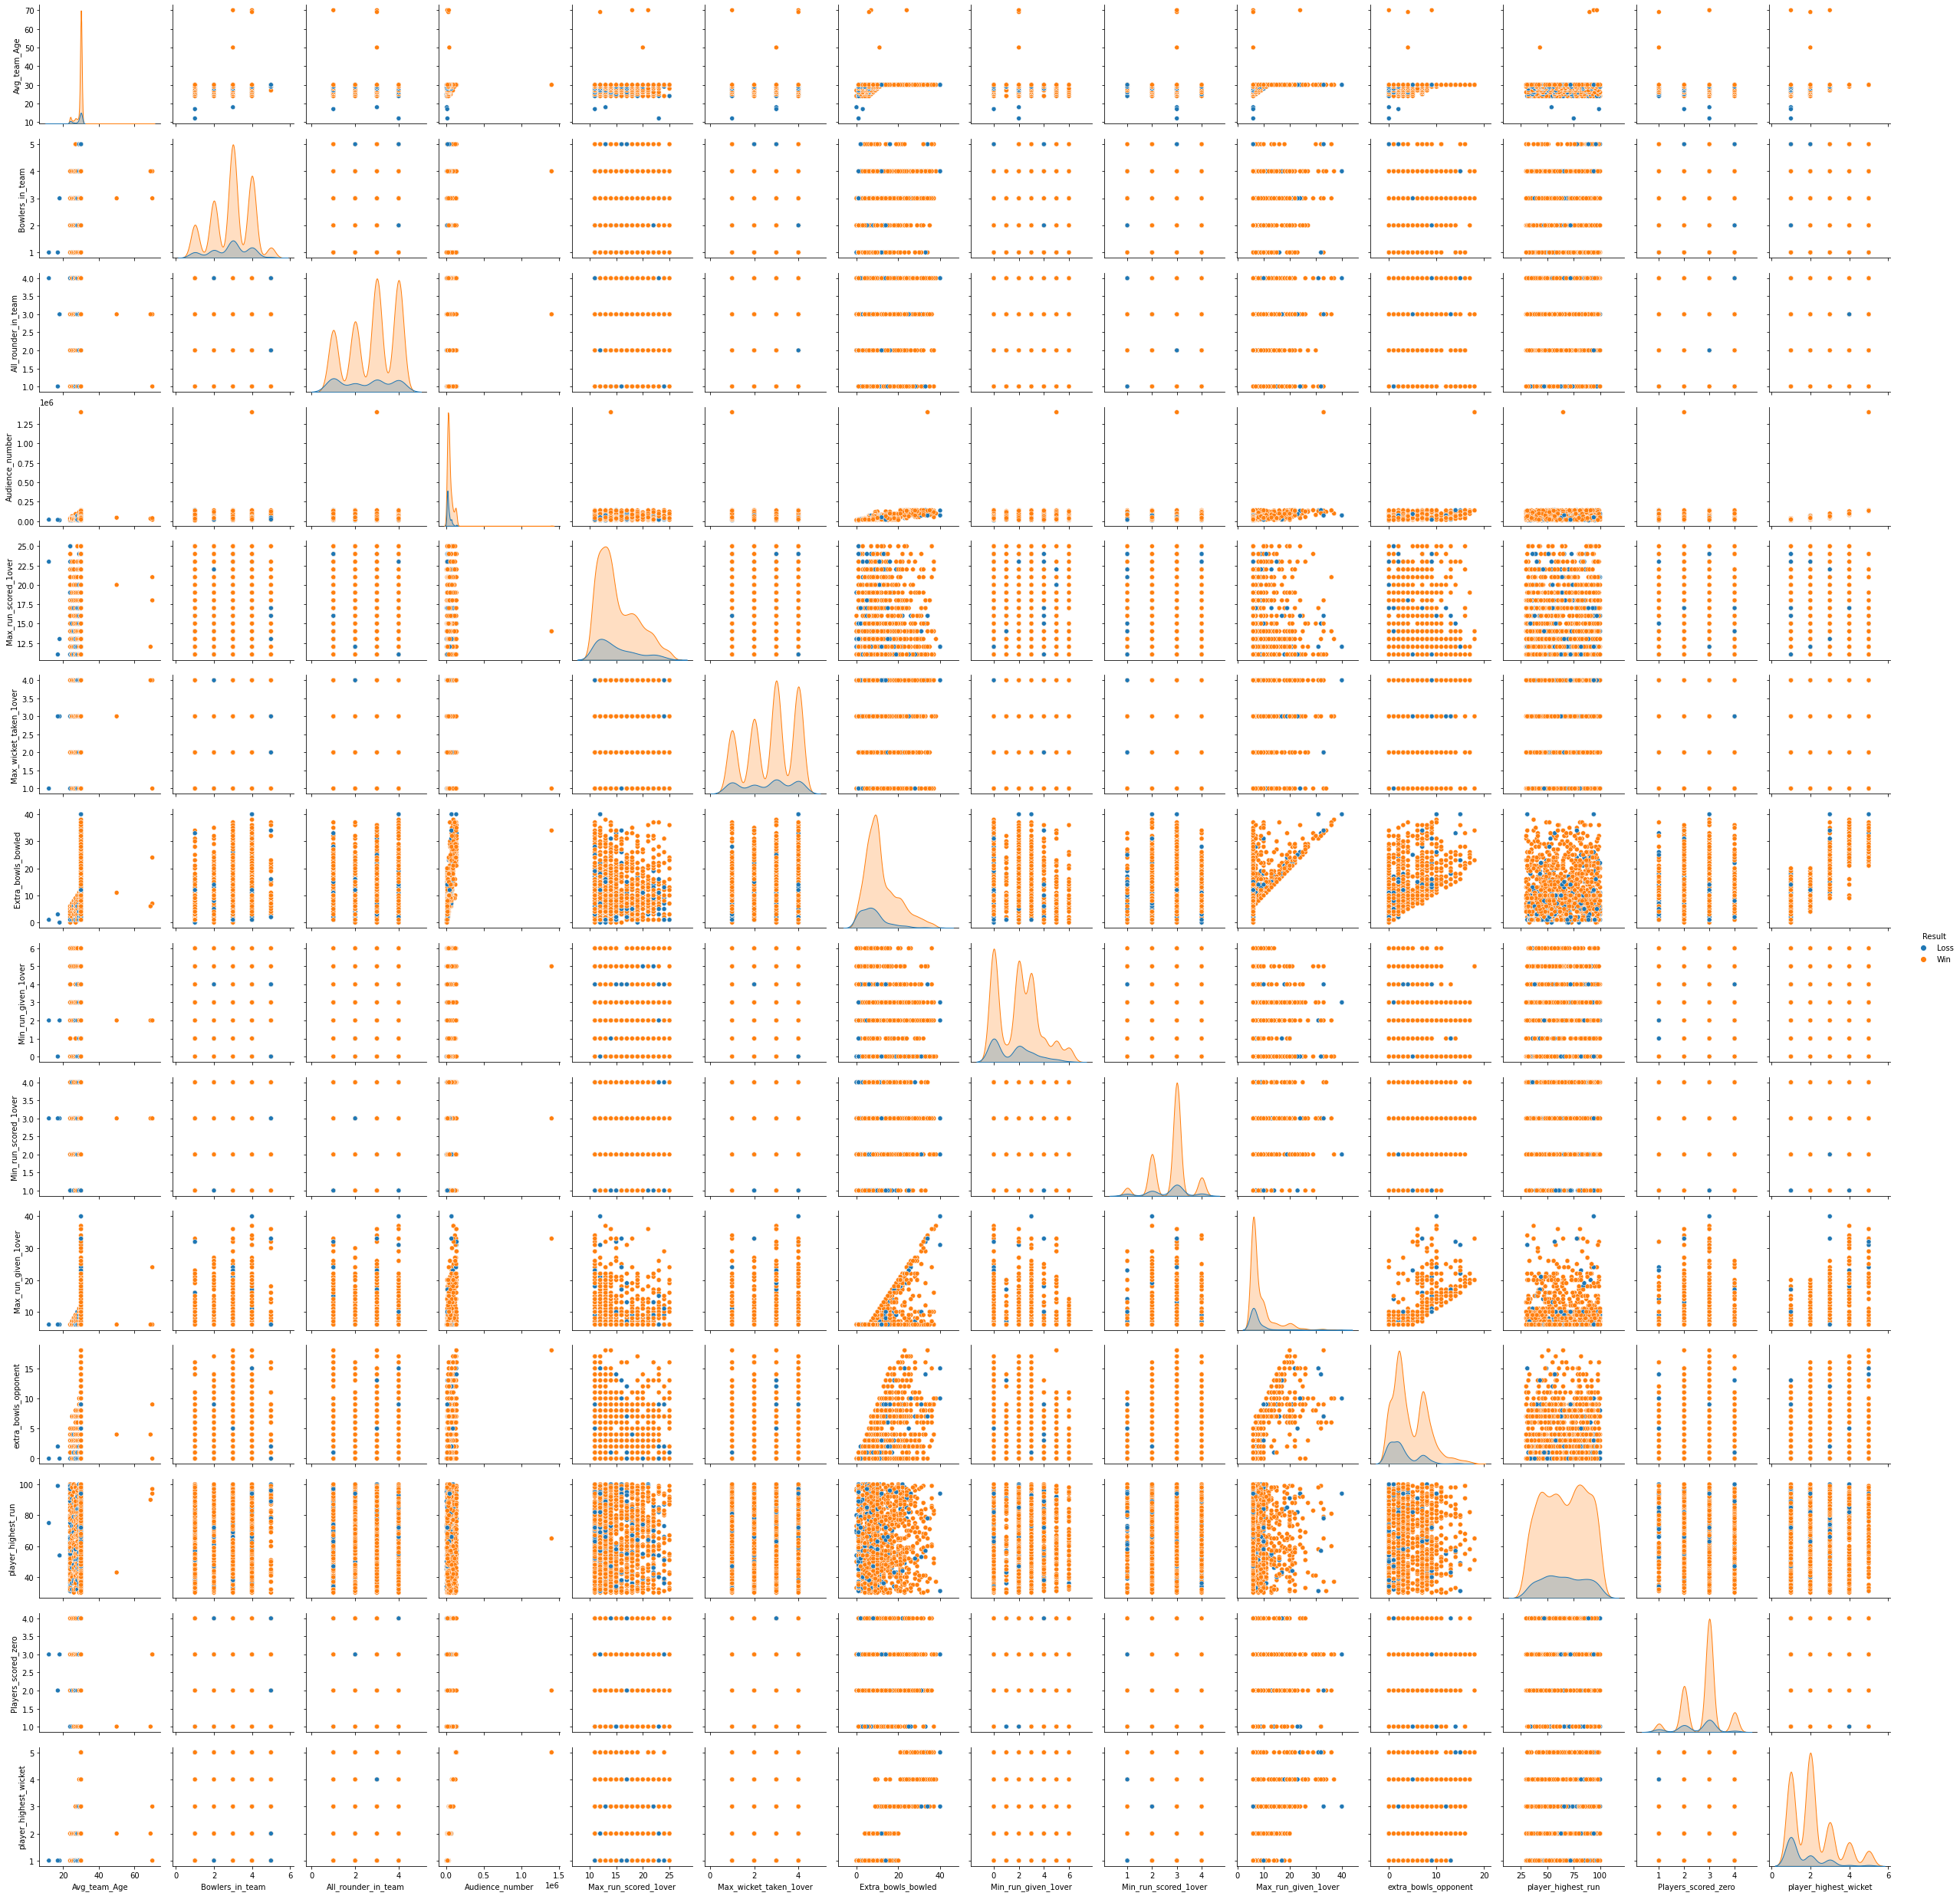

In [100]:
plt.figure(figsize = (10,8))
sns.pairplot(Data, hue ='Result')
plt.show()

In [101]:
for column in ['Match_light_type','Match_format','First_selection','Opponent','Season','Offshore','Players_scored_zero','player_highest_wicket']:
    Data[column].fillna(Data[column].mode()[0], inplace=True)

In [102]:
cat1=['Match_light_type','Match_format','First_selection','Opponent','Season','Offshore','Players_scored_zero','player_highest_wicket']

In [103]:
for i in cat1:
    Data[i]=Data[i].astype("object")

In [104]:
for i in num:
    Data[i].fillna(Data[i].median(),inplace=True)

In [105]:
Data.isnull().sum()

Result                    0
Avg_team_Age              0
Match_light_type          0
Match_format              0
Bowlers_in_team           0
All_rounder_in_team       0
First_selection           0
Opponent                  0
Season                    0
Audience_number           0
Offshore                  0
Max_run_scored_1over      0
Max_wicket_taken_1over    0
Extra_bowls_bowled        0
Min_run_given_1over       0
Min_run_scored_1over      0
Max_run_given_1over       0
extra_bowls_opponent      0
player_highest_run        0
Players_scored_zero       0
player_highest_wicket     0
dtype: int64

# Outlier Detection and Treatment

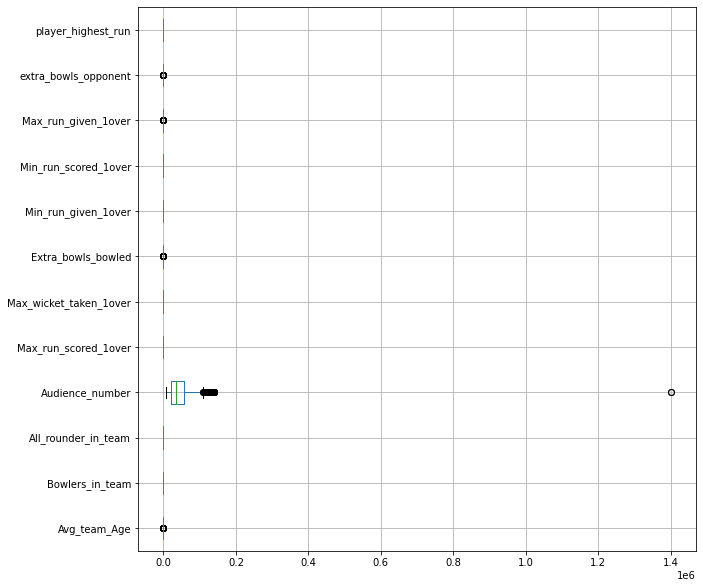

In [106]:
plt.figure(figsize=(10,10))
Data.iloc[:,:21].boxplot(vert=0)
plt.show()

There are outliers present in 'Averege Age', 'Extra balls bowled', 'Audience number', 'extras_bowled_opponent', 'Max_runs_given_1over'. As dropping outliers may lead to loss of huge data. Therefore no outlier treatment is applicable for this dataset.The outliers in Audience Number is due to the different capacity of the stadiums so there is no need to remove them.

# Variable Transformation

#### Dummy Variables for categorical variables

In [107]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Result                  2930 non-null   object 
 1   Avg_team_Age            2930 non-null   float64
 2   Match_light_type        2930 non-null   object 
 3   Match_format            2930 non-null   object 
 4   Bowlers_in_team         2930 non-null   float64
 5   All_rounder_in_team     2930 non-null   float64
 6   First_selection         2930 non-null   object 
 7   Opponent                2930 non-null   object 
 8   Season                  2930 non-null   object 
 9   Audience_number         2930 non-null   float64
 10  Offshore                2930 non-null   object 
 11  Max_run_scored_1over    2930 non-null   float64
 12  Max_wicket_taken_1over  2930 non-null   int64  
 13  Extra_bowls_bowled      2930 non-null   float64
 14  Min_run_given_1over     2930 non-null   

In [108]:
for column in Data.columns:
    if Data[column].dtype == 'object':
        print(column.upper(),': ',Data[column].nunique())
        print(Data[column].value_counts().sort_values())
        print('\n')

RESULT :  2
Loss     473
Win     2457
Name: Result, dtype: int64


MATCH_LIGHT_TYPE :  3
Night             296
Day and Night     541
Day              2093
Name: Match_light_type, dtype: int64


MATCH_FORMAT :  3
Test     125
T20      870
ODI     1935
Name: Match_format, dtype: int64


FIRST_SELECTION :  2
Batting    1149
Bowling    1781
Name: First_selection, dtype: int64


OPPONENT :  9
Australia       104
West Indies     158
Zimbabwe        163
Bangladesh      204
Pakistan        253
England         283
Srilanka        513
Kenya           576
South Africa    676
Name: Opponent, dtype: int64


SEASON :  3
Winter     641
Summer     918
Rainy     1371
Name: Season, dtype: int64


OFFSHORE :  2
Yes     809
No     2121
Name: Offshore, dtype: int64


PLAYERS_SCORED_ZERO :  4
1     166
4     285
2     744
3    1735
Name: Players_scored_zero, dtype: int64


PLAYER_HIGHEST_WICKET :  5
5     138
4     211
3     434
2    1063
1    1084
Name: player_highest_wicket, dtype: int64




In [109]:
print(cat)

['Result', 'Match_light_type', 'Match_format', 'First_selection', 'Opponent', 'Season', 'Offshore', 'Players_scored_zero', 'player_highest_wicket']


In [110]:
Data = pd.get_dummies(Data,columns=cat,drop_first=True)

In [111]:
Data.head()

,Avg_team_Age,Bowlers_in_team,All_rounder_in_team,Audience_number,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,...,Season_Summer,Season_Winter,Offshore_Yes,Players_scored_zero_2,Players_scored_zero_3,Players_scored_zero_4,player_highest_wicket_2,player_highest_wicket_3,player_highest_wicket_4,player_highest_wicket_5
0,18.0,3.0,3.0,9940.0,13.0,3,0.0,2,3.0,6.0,...,1,0,0,0,1,0,0,0,0,0
1,24.0,3.0,4.0,8400.0,12.0,1,0.0,0,3.0,6.0,...,1,0,0,1,0,0,0,0,0,0
2,24.0,3.0,2.0,13146.0,14.0,4,0.0,0,3.0,6.0,...,0,0,1,0,1,0,0,0,0,0
3,24.0,2.0,2.0,7357.0,15.0,4,0.0,2,3.0,6.0,...,1,0,0,0,1,0,0,0,0,0
4,24.0,1.0,3.0,13328.0,12.0,4,0.0,0,3.0,6.0,...,1,0,0,0,1,0,0,0,0,0


In [112]:
Data.describe(include = 'all'). T

,count,mean,std,min,25%,50%,75%,max
Avg_team_Age,2930.0,29.267918,2.230540,12.0,30.0,30.0,30.00,70.0
Bowlers_in_team,2930.0,2.916041,1.009573,1.0,2.0,3.0,4.00,5.0
All_rounder_in_team,2930.0,2.726280,1.085690,1.0,2.0,3.0,4.00,4.0
Audience_number,2930.0,45938.460410,47962.711339,7063.0,20608.0,34349.0,55931.75,1399930.0
Max_run_scored_1over,2930.0,15.188396,3.645339,11.0,12.0,14.0,18.00,25.0
Max_wicket_taken_1over,2930.0,2.713993,1.080623,1.0,2.0,3.0,4.00,4.0
Extra_bowls_bowled,2930.0,11.240273,7.743208,0.0,6.0,10.0,15.00,40.0
Min_run_given_1over,2930.0,1.952560,1.678332,0.0,0.0,2.0,3.00,6.0
Min_run_scored_1over,2930.0,2.764846,0.702864,1.0,2.0,3.0,3.00,4.0
Max_run_given_1over,2930.0,8.638225,4.982610,6.0,6.0,6.0,9.00,40.0


In [113]:
Data["Result_Win"].astype("int")

0       0
1       1
2       0
3       1
4       0
       ..
2925    1
2926    1
2927    1
2928    1
2929    1
Name: Result_Win, Length: 2930, dtype: int32

# Scaling Data

In [114]:
from sklearn.preprocessing import StandardScaler

In [115]:
X = StandardScaler()

In [116]:
scaled_Data = X.fit_transform(Data)

In [117]:
scaled_Data

array([[-5.05251618,  0.08317713,  0.25215942, ..., -0.41698706,
        -0.27857146, -0.22232169],
       [-2.36212592,  0.08317713,  1.17339022, ..., -0.41698706,
        -0.27857146, -0.22232169],
       [-2.36212592,  0.08317713, -0.66907138, ..., -0.41698706,
        -0.27857146, -0.22232169],
       ...,
       [ 0.32826434,  1.07386414,  0.25215942, ..., -0.41698706,
        -0.27857146, -0.22232169],
       [ 0.32826434,  1.07386414,  0.25215942, ..., -0.41698706,
        -0.27857146, -0.22232169],
       [ 0.32826434,  1.07386414,  0.25215942, ..., -0.41698706,
        -0.27857146, -0.22232169]])

# Clustering

In [118]:
from sklearn.cluster import KMeans 

In [119]:
k_means = KMeans(n_clusters = 2)

In [120]:
k_means.fit(scaled_Data)

KMeans(n_clusters=2)

In [121]:
k_means.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [122]:
k_means.inertia_

97001.91453754347

In [123]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_Data)
k_means.inertia_

89480.37835489523

In [124]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_Data)
k_means.inertia_

85663.17058396574

In [125]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_Data)
k_means.inertia_

81330.3052122231

In [126]:
k_means = KMeans(n_clusters = 6)
k_means.fit(scaled_Data)
k_means.inertia_

78394.06831013659

In [127]:
k_means = KMeans(n_clusters = 7)
k_means.fit(scaled_Data)
k_means.inertia_

74659.73725794259

In [128]:
k_means = KMeans(n_clusters = 8)
k_means.fit(scaled_Data)
k_means.inertia_

71776.36121441527

In [129]:
wss =[] 

In [130]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_Data)
    wss.append(KM.inertia_)

In [131]:
wss

[105479.99999999997,
 97002.4831026799,
 89480.37835489523,
 85224.90879189303,
 81330.16488533527,
 77803.8601052048,
 74514.65711925732,
 71918.31096359227,
 68941.62247791425,
 67203.5634631136]

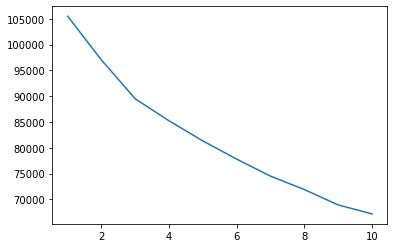

In [132]:
plt.plot(range(1,11), wss)

In [133]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_Data)
labels = k_means.labels_

In [134]:
Data["Clus_kmeans"] = labels
Data.head(5)

,Avg_team_Age,Bowlers_in_team,All_rounder_in_team,Audience_number,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,...,Season_Winter,Offshore_Yes,Players_scored_zero_2,Players_scored_zero_3,Players_scored_zero_4,player_highest_wicket_2,player_highest_wicket_3,player_highest_wicket_4,player_highest_wicket_5,Clus_kmeans
0,18.0,3.0,3.0,9940.0,13.0,3,0.0,2,3.0,6.0,...,0,0,0,1,0,0,0,0,0,1
1,24.0,3.0,4.0,8400.0,12.0,1,0.0,0,3.0,6.0,...,0,0,1,0,0,0,0,0,0,2
2,24.0,3.0,2.0,13146.0,14.0,4,0.0,0,3.0,6.0,...,0,1,0,1,0,0,0,0,0,2
3,24.0,2.0,2.0,7357.0,15.0,4,0.0,2,3.0,6.0,...,0,0,0,1,0,0,0,0,0,1
4,24.0,1.0,3.0,13328.0,12.0,4,0.0,0,3.0,6.0,...,0,0,0,1,0,0,0,0,0,1


In [135]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [136]:
silhouette_score(scaled_Data,labels)

0.0957968388182515

In [137]:
sil_width = silhouette_samples(scaled_Data,labels)

In [138]:
Data["sil_width"] = sil_width
Data.head(5)

,Avg_team_Age,Bowlers_in_team,All_rounder_in_team,Audience_number,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,...,Offshore_Yes,Players_scored_zero_2,Players_scored_zero_3,Players_scored_zero_4,player_highest_wicket_2,player_highest_wicket_3,player_highest_wicket_4,player_highest_wicket_5,Clus_kmeans,sil_width
0,18.0,3.0,3.0,9940.0,13.0,3,0.0,2,3.0,6.0,...,0,0,1,0,0,0,0,0,1,0.071012
1,24.0,3.0,4.0,8400.0,12.0,1,0.0,0,3.0,6.0,...,0,1,0,0,0,0,0,0,2,0.098823
2,24.0,3.0,2.0,13146.0,14.0,4,0.0,0,3.0,6.0,...,1,0,1,0,0,0,0,0,2,0.100381
3,24.0,2.0,2.0,7357.0,15.0,4,0.0,2,3.0,6.0,...,0,0,1,0,0,0,0,0,1,0.111081
4,24.0,1.0,3.0,13328.0,12.0,4,0.0,0,3.0,6.0,...,0,0,1,0,0,0,0,0,1,0.049077


# SMOTE : Balancing Data

In [139]:
!pip install imbalanced-learn

In [140]:
from imblearn.over_sampling import SMOTE

# Model Building

## Data Splitting

In [141]:
X=Data.drop("Result_Win",axis=1)

y=Data["Result_Win"]

In [142]:
X.head()

,Avg_team_Age,Bowlers_in_team,All_rounder_in_team,Audience_number,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,...,Offshore_Yes,Players_scored_zero_2,Players_scored_zero_3,Players_scored_zero_4,player_highest_wicket_2,player_highest_wicket_3,player_highest_wicket_4,player_highest_wicket_5,Clus_kmeans,sil_width
0,18.0,3.0,3.0,9940.0,13.0,3,0.0,2,3.0,6.0,...,0,0,1,0,0,0,0,0,1,0.071012
1,24.0,3.0,4.0,8400.0,12.0,1,0.0,0,3.0,6.0,...,0,1,0,0,0,0,0,0,2,0.098823
2,24.0,3.0,2.0,13146.0,14.0,4,0.0,0,3.0,6.0,...,1,0,1,0,0,0,0,0,2,0.100381
3,24.0,2.0,2.0,7357.0,15.0,4,0.0,2,3.0,6.0,...,0,0,1,0,0,0,0,0,1,0.111081
4,24.0,1.0,3.0,13328.0,12.0,4,0.0,0,3.0,6.0,...,0,0,1,0,0,0,0,0,1,0.049077


In [143]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: Result_Win, dtype: uint8

# Model Building

In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [145]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [247]:
Data.shape

(2930, 38)

In [146]:
X_train_res.shape

(3444, 37)

In [147]:
y_train_res.shape

(3444,)

## Logistic Regression

In [148]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [149]:
from sklearn.model_selection import train_test_split
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X, y, test_size=0.30 , random_state=1)

In [150]:
sm = SMOTE(random_state=2)
X_train_res_LR, y_train_res_LR = sm.fit_resample(X_train_LR, y_train_LR.ravel())

In [151]:
# Fit the Logistic Regression model
LR_model = LogisticRegression(solver='newton-cg',max_iter=1000,penalty='none',verbose=True,n_jobs=3)
LR_model.fit(X_train_res_LR, y_train_res_LR)

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:    2.4s finished


LogisticRegression(max_iter=1000, n_jobs=3, penalty='none', solver='newton-cg',
                   verbose=True)

In [152]:
y_train_predict_LR = LR_model.predict(X_train_res_LR)
model_score_LR=LR_model.score(X_train_res_LR, y_train_res_LR)
print(model_score_LR)
print(metrics.confusion_matrix(y_train_res_LR,y_train_predict_LR ))
print(metrics.classification_report(y_train_res_LR,y_train_predict_LR))

0.8745644599303136
[[1467  255]
 [ 177 1545]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1722
           1       0.86      0.90      0.88      1722

    accuracy                           0.87      3444
   macro avg       0.88      0.87      0.87      3444
weighted avg       0.88      0.87      0.87      3444



In [153]:
y_test_predict_LR = LR_model.predict(X_test_LR)
model_score_LR=LR_model.score(X_test_LR, y_test_LR)
print(model_score_LR)
print(metrics.confusion_matrix(y_test_LR,y_test_predict_LR))
print(metrics.classification_report(y_test_LR,y_test_predict_LR))

0.8612059158134243
[[ 90  54]
 [ 68 667]]
              precision    recall  f1-score   support

           0       0.57      0.62      0.60       144
           1       0.93      0.91      0.92       735

    accuracy                           0.86       879
   macro avg       0.75      0.77      0.76       879
weighted avg       0.87      0.86      0.86       879



### Train Data Metrics Before Model Tuning

In [154]:
LR_metrics=classification_report(y_train_res_LR, y_train_predict_LR,output_dict=True)
df=pd.DataFrame(LR_metrics).transpose()
LR_train_precision_BT=round(df.loc["1"][0],2)
LR_train_recall_BT=round(df.loc["1"][1],2)
LR_train_f1_BT=round(df.loc["1"][2],2)
print ('LR_train_precision Before Tuning ',LR_train_precision_BT)
print ('LR_train_recall Before Tuning ',LR_train_recall_BT)
print ('LR_train_f1 Before Tuning',LR_train_f1_BT)

LR_train_precision Before Tuning  0.86
LR_train_recall Before Tuning  0.9
LR_train_f1 Before Tuning 0.88


### Test Data Metrics Before Model Tuning

In [155]:
LR_metrics=classification_report(y_test_LR, y_test_predict_LR,output_dict=True)
df=pd.DataFrame(LR_metrics).transpose()
LR_test_precision_BT=round(df.loc["1"][0],2)
LR_test_recall_BT=round(df.loc["1"][1],2)
LR_test_f1_BT=round(df.loc["1"][2],2)
print ('LR_test_precision Before Tuning ',LR_test_precision_BT)
print ('LR_test_recall Before Tuning',LR_test_recall_BT)
print ('LR_test_f1 Before Tuning ',LR_test_f1_BT)

LR_test_precision Before Tuning  0.93
LR_test_recall Before Tuning 0.91
LR_test_f1 Before Tuning  0.92


AUC: 0.943


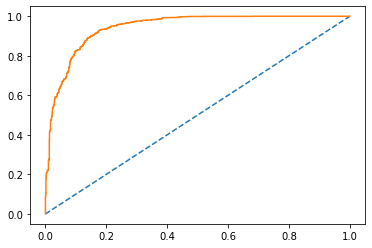

In [156]:
# predict probabilities
probs = LR_model.predict_proba(X_train_res_LR)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc_LR = roc_auc_score(y_train_res_LR, probs)
print('AUC: %.3f' % train_auc_LR)
# calculate roc curve
train_fpr_LR, train_tpr_LR, train_thresholds = roc_curve(y_train_res_LR, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_LR, train_tpr_LR);

AUC: 0.864


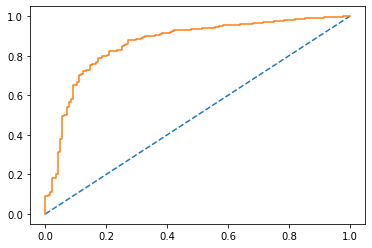

In [157]:
probs=LR_model.predict_proba(X_test_LR)

probs=probs[:,1]

test_auc_LR=roc_auc_score(y_test_LR,probs)
print('AUC: %.3f' %test_auc_LR)

test_fpr_LR, test_tpr_LR,test_thresholds= roc_curve(y_test_LR,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr_LR,test_tpr_LR)

## Grid Search

In [250]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.001,0.0001]}

In [251]:
grid_search = GridSearchCV(estimator = LR_model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [252]:
grid_search.fit(X_train_res_LR, y_train_res_LR)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


convergence after 998 epochs took 1 seconds


[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:    1.3s finished


GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=1000, n_jobs=3,
                                          penalty='none', solver='newton-cg',
                                          verbose=True),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.001, 0.0001]},
             scoring='f1')

In [253]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.001} 

LogisticRegression(max_iter=1000, n_jobs=3, solver='sag', tol=0.001,
                   verbose=True)


In [254]:
best_model = grid_search.best_estimator_

In [255]:
# Prediction on the training set

ytrain_predict_LR = best_model.predict(X_train_res_LR)
ytest_predict_LR = best_model.predict(X_test_LR)

In [256]:
## Getting the probabilities on the test set
 
ytest_predict_prob=best_model.predict_proba(X_test_LR)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.478052,0.521948
1,0.477567,0.522433
2,0.391771,0.608229
3,0.469286,0.530714
4,0.470795,0.529205


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1722
           1       0.50      1.00      0.67      1722

    accuracy                           0.50      3444
   macro avg       0.25      0.50      0.33      3444
weighted avg       0.25      0.50      0.33      3444
 



0.5

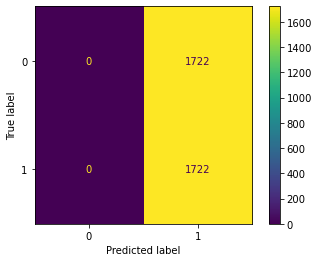

In [257]:
## Confusion matrix on the training data
model_score= best_model.score(X_train_res_LR, y_train_res_LR)
plot_confusion_matrix(best_model,X_train_res_LR,y_train_res_LR)
print(classification_report(y_train_res_LR, ytrain_predict_LR),'\n');
model_score

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       144
           1       0.84      1.00      0.91       735

    accuracy                           0.84       879
   macro avg       0.42      0.50      0.46       879
weighted avg       0.70      0.84      0.76       879
 



0.8361774744027304

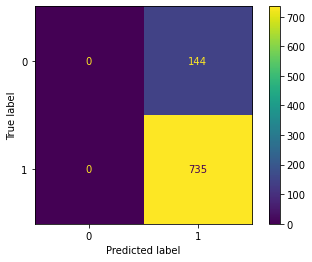

In [258]:
## Confusion matrix on the test data
model_score= best_model.score(X_test_LR, y_test_LR)
plot_confusion_matrix(best_model,X_test_LR,y_test_LR)
print(classification_report(y_test_LR, ytest_predict_LR),'\n')
model_score

AUC: 0.654


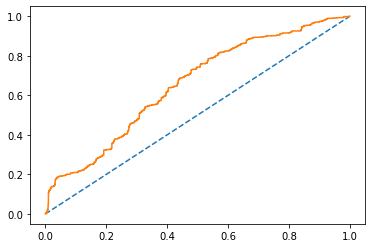

In [259]:
# predict probabilities
probs = best_model.predict_proba(X_train_res_LR)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc_LR_AT = roc_auc_score(y_train_res_LR, probs)
print('AUC: %.3f' % train_auc_LR_AT)
# calculate roc curve
train_fpr_LR_AT, train_tpr_LR_AT, train_thresholds = roc_curve(y_train_res_LR, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_LR_AT, train_tpr_LR_AT);

AUC: 0.660


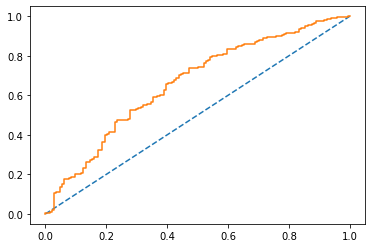

In [260]:
probs=best_model.predict_proba(X_test_LR)

probs=probs[:,1]

test_auc_LR_AT=roc_auc_score(y_test_LR,probs)
print('AUC: %.3f' %test_auc_LR_AT)

test_fpr_LR_AT, test_tpr_LR_AT,test_thresholds= roc_curve(y_test_LR,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr_LR_AT,test_tpr_LR_AT)

## Variable Importance

                                         Imp
Audience_number                 6.118712e-06
extra_bowls_opponent            1.572783e-06
Extra_bowls_bowled              8.561687e-07
Min_run_given_1over             5.091470e-07
Season_Winter                   2.273072e-07
player_highest_wicket_2         1.983886e-07
Opponent_Kenya                  1.660866e-07
Players_scored_zero_3           1.651861e-07
Match_light_type_Night          1.367701e-07
Opponent_England                1.274973e-07
Players_scored_zero_4           1.234050e-07
Players_scored_zero_2           1.008905e-07
Opponent_Pakistan               1.008109e-07
Opponent_Bangladesh             8.567304e-08
Opponent_West Indies            7.087980e-08
player_highest_wicket_4         6.379428e-08
player_highest_wicket_5         3.919326e-08
Match_format_Test               2.339395e-08
Match_light_type_Day and Night -1.216688e-08
player_highest_wicket_3        -2.513893e-08
sil_width                      -3.717388e-08
Opponent_S

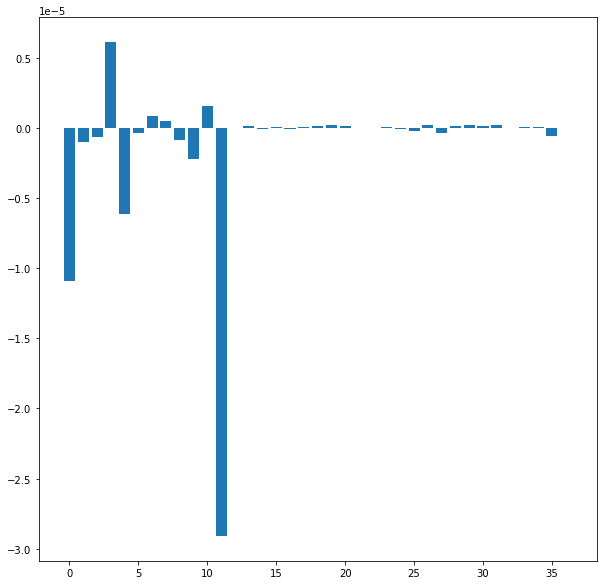

In [170]:
importance = best_model.coef_[0]
df=pd.DataFrame(importance, columns = ["Imp"], index = X_train_res_LR.columns)
print(df.sort_values(by=["Imp"],ascending=False))
# plot feature importance
plt.figure(figsize=(10,10))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Train Metrics After Model Tuning

In [171]:
LR_metrics=classification_report(y_train_res_LR, ytrain_predict_LR,output_dict=True)
df=pd.DataFrame(LR_metrics).transpose()
LR_train_precision_AT=round(df.loc["1"][0],2)
LR_train_recall_AT=round(df.loc["1"][1],2)
LR_train_f1_AT=round(df.loc["1"][2],2)
print ('LR_train_precision After Tuning',LR_train_precision_AT)
print ('LR_train_recall After Tuning',LR_train_recall_AT)
print ('LR_train_f1 After Tuning',LR_train_f1_AT)

LR_train_precision After Tuning 0.5
LR_train_recall After Tuning 1.0
LR_train_f1 After Tuning 0.67


## Train Metrics After Model Tuning

In [172]:
LR_metrics=classification_report(y_test_LR, ytest_predict_LR,output_dict=True)
df=pd.DataFrame(LR_metrics).transpose()
LR_test_precision_AT=round(df.loc["1"][0],2)
LR_test_recall_AT=round(df.loc["1"][1],2)
LR_test_f1_AT=round(df.loc["1"][2],2)
print ('LR_test_precision After Tuning',LR_test_precision_AT)
print ('LR_test_recall After Tuning',LR_test_recall_AT)
print ('LR_test_f1 After Tuning',LR_test_f1_AT)

LR_test_precision After Tuning 0.84
LR_test_recall After Tuning 1.0
LR_test_f1 After Tuning 0.91


# Decision Tree

In [173]:
from sklearn.model_selection import train_test_split
X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(X, y, test_size=0.30 , random_state=1)

In [174]:
from sklearn import tree

DT_model= tree.DecisionTreeClassifier(criterion = 'gini', random_state=1)

In [175]:
sm = SMOTE(random_state=2)
X_train_res_DT, y_train_res_DT = sm.fit_resample(X_train_DT, y_train_DT.ravel())

In [176]:
DT_model.fit(X_train_res_DT, y_train_res_DT)

DecisionTreeClassifier(random_state=1)

In [177]:
## Performance Matrix on train data set
y_train_predict_DT = DT_model.predict(X_train_res_DT)
model_score_DT = DT_model.score(X_train_res_DT, y_train_res_DT)
print(model_score_DT)
print(metrics.confusion_matrix(y_train_res_DT, y_train_predict_DT))
print(metrics.classification_report(y_train_res_DT, y_train_predict_DT))

1.0
[[1722    0]
 [   0 1722]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1722
           1       1.00      1.00      1.00      1722

    accuracy                           1.00      3444
   macro avg       1.00      1.00      1.00      3444
weighted avg       1.00      1.00      1.00      3444



In [178]:
## Performance Matrix on test data set
y_test_predict_DT = DT_model.predict(X_test_DT)
model_score_DT = DT_model.score(X_test_DT, y_test_DT)
print(model_score_DT)
print(metrics.confusion_matrix(y_test_DT, y_test_predict_DT))
print(metrics.classification_report(y_test_DT, y_test_predict_DT))

0.9112627986348123
[[115  29]
 [ 49 686]]
              precision    recall  f1-score   support

           0       0.70      0.80      0.75       144
           1       0.96      0.93      0.95       735

    accuracy                           0.91       879
   macro avg       0.83      0.87      0.85       879
weighted avg       0.92      0.91      0.91       879



## Train metrics

In [179]:
DT_metrics=classification_report(y_train_res_DT, y_train_predict_DT,output_dict=True)
df=pd.DataFrame(DT_metrics).transpose()
DT_train_precision_BT=round(df.loc["1"][0],2)
DT_train_recall_BT=round(df.loc["1"][1],2)
DT_train_f1_BT=round(df.loc["1"][2],2)
print ('DT_train_precision Before Tuning',DT_train_precision_BT)
print ('DT_train_recall Before Tuning',DT_train_recall_BT)
print ('DT_train_f1 Before Tuning',DT_train_f1_BT)

DT_train_precision Before Tuning 1.0
DT_train_recall Before Tuning 1.0
DT_train_f1 Before Tuning 1.0


## Test Metrics

In [180]:
DT_metrics=classification_report(y_test_DT, y_test_predict_DT,output_dict=True)
df=pd.DataFrame(DT_metrics).transpose()
DT_test_precision_BT=round(df.loc["1"][0],2)
DT_test_recall_BT=round(df.loc["1"][1],2)
DT_test_f1_BT=round(df.loc["1"][2],2)
print ('DT_test_precision Before Tuning ',DT_test_precision_BT)
print ('DT_test_recall Before Tuning',DT_test_recall_BT)
print ('DT_test_f1 Before Tuning',DT_test_f1_BT)

DT_test_precision Before Tuning  0.96
DT_test_recall Before Tuning 0.93
DT_test_f1 Before Tuning 0.95


AUC: 1.000


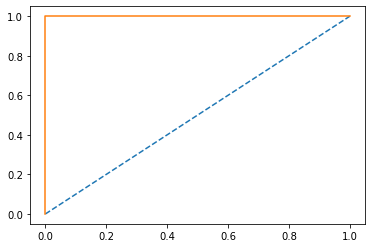

In [181]:
# predict probabilities
probs = DT_model.predict_proba(X_train_res_DT)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc_DT = roc_auc_score(y_train_res_DT, probs)
print('AUC: %.3f' % train_auc_DT)
# calculate roc curve
train_fpr_DT, train_tpr_DT, train_thresholds = roc_curve(y_train_res_DT, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_DT, train_tpr_DT);

AUC: 0.866


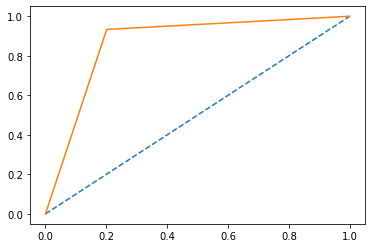

In [182]:
probs=DT_model.predict_proba(X_test_DT)

probs=probs[:,1]

test_auc_DT=roc_auc_score(y_test_DT,probs)
print('AUC: %.3f' %test_auc_DT)

test_fpr_DT, test_tpr_DT,test_thresholds= roc_curve(y_test_DT,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr_DT,test_tpr_DT)

## Grid Search

In [183]:
param_grid = {
    'max_depth': [10,15,20,25,30],
    'min_samples_leaf': [5, 15,30],
    'min_samples_split': [15,30,35,40,50],
}


grid_search = GridSearchCV(estimator = DT_model, param_grid = param_grid, cv = 3)


grid_search.fit(X_train_res_DT,y_train_res_DT)

print(grid_search.best_params_)

{'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 15}


In [184]:
best_model = grid_search.best_estimator_

In [185]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train_res_DT)
ytest_predict = best_model.predict(X_test_DT)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1722
           1       0.94      0.94      0.94      1722

    accuracy                           0.94      3444
   macro avg       0.94      0.94      0.94      3444
weighted avg       0.94      0.94      0.94      3444
 



0.9396051103368177

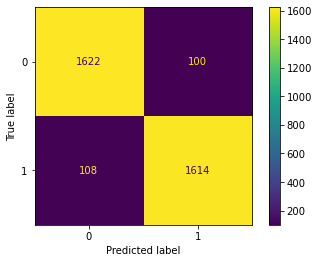

In [186]:
## Confusion matrix on the training data
model_score= best_model.score(X_train_res_DT, y_train_res_DT)
plot_confusion_matrix(best_model,X_train_res_DT,y_train_res_DT)
print(classification_report(y_train_res_DT, ytrain_predict),'\n');
model_score

              precision    recall  f1-score   support

           0       0.54      0.62      0.58       144
           1       0.92      0.90      0.91       735

    accuracy                           0.85       879
   macro avg       0.73      0.76      0.74       879
weighted avg       0.86      0.85      0.85       879
 



0.850967007963595

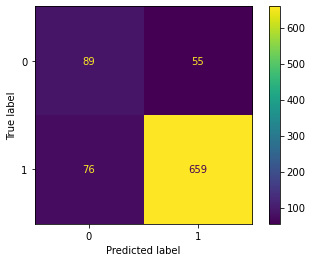

In [187]:
## Confusion matrix on the test data
model_score= best_model.score(X_test_DT, y_test_DT)
plot_confusion_matrix(best_model,X_test_DT,y_test_DT)
print(classification_report(y_test_DT, ytest_predict),'\n')
model_score

## Train Metrics After Tuning

In [188]:
DT_metrics=classification_report(y_train_res_DT, ytrain_predict,output_dict=True)
df=pd.DataFrame(DT_metrics).transpose()
DT_train_precision_AT=round(df.loc["1"][0],2)
DT_train_recall_AT=round(df.loc["1"][1],2)
DT_train_f1_AT=round(df.loc["1"][2],2)
print ('DT_train_precision After Tuning',DT_train_precision_AT)
print ('DT_train_recall After Tuning',DT_train_recall_AT)
print ('DT_train_f1 After Tuning',DT_train_f1_AT)

DT_train_precision After Tuning 0.94
DT_train_recall After Tuning 0.94
DT_train_f1 After Tuning 0.94


## Test Metrics After Tuning

In [189]:
DT_metrics=classification_report(y_test_DT, ytest_predict,output_dict=True)
df=pd.DataFrame(DT_metrics).transpose()
DT_test_precision_AT=round(df.loc["1"][0],2)
DT_test_recall_AT=round(df.loc["1"][1],2)
DT_test_f1_AT=round(df.loc["1"][2],2)
print ('DT_test_precision After Tuning',DT_test_precision_AT)
print ('DT_test_recall After Tuning',DT_test_recall_AT)
print ('DT_test_f1 After Tuning',DT_test_f1_AT)

DT_test_precision After Tuning 0.92
DT_test_recall After Tuning 0.9
DT_test_f1 After Tuning 0.91


AUC: 0.991


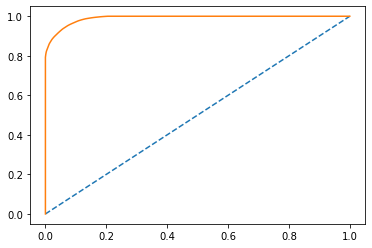

In [190]:
# predict probabilities
probs = best_model.predict_proba(X_train_res_DT)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc_DT_AT = roc_auc_score(y_train_res_DT, probs)
print('AUC: %.3f' % train_auc_DT_AT)
# calculate roc curve
train_fpr_DT_AT, train_tpr_DT_AT, train_thresholds = roc_curve(y_train_res_DT, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_DT_AT, train_tpr_DT_AT);

AUC: 0.865


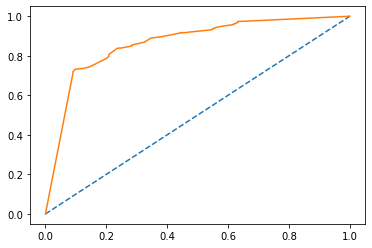

In [191]:
probs=best_model.predict_proba(X_test_DT)

probs=probs[:,1]

test_auc_DT_AT=roc_auc_score(y_test_DT,probs)
print('AUC: %.3f' %test_auc_DT_AT)

test_fpr_DT_AT, test_tpr_DT_AT,test_thresholds= roc_curve(y_test_DT,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr_DT_AT,test_tpr_DT_AT)

## Feature Importance

                                     Imp
Avg_team_Age                    0.142622
Audience_number                 0.106698
sil_width                       0.084505
player_highest_run              0.061943
player_highest_wicket_2         0.059734
Min_run_given_1over             0.050820
Opponent_Kenya                  0.045220
All_rounder_in_team             0.043803
Max_wicket_taken_1over          0.043039
Offshore_Yes                    0.041109
Bowlers_in_team                 0.040108
extra_bowls_opponent            0.038372
Players_scored_zero_2           0.035935
Players_scored_zero_4           0.035847
Max_run_scored_1over            0.035540
Players_scored_zero_3           0.032962
Extra_bowls_bowled              0.032053
Match_light_type_Night          0.015307
Season_Summer                   0.010061
Min_run_scored_1over            0.009058
Season_Winter                   0.008469
Match_format_Test               0.007144
First_selection_Bowling         0.006523
Opponent_Zimbabw

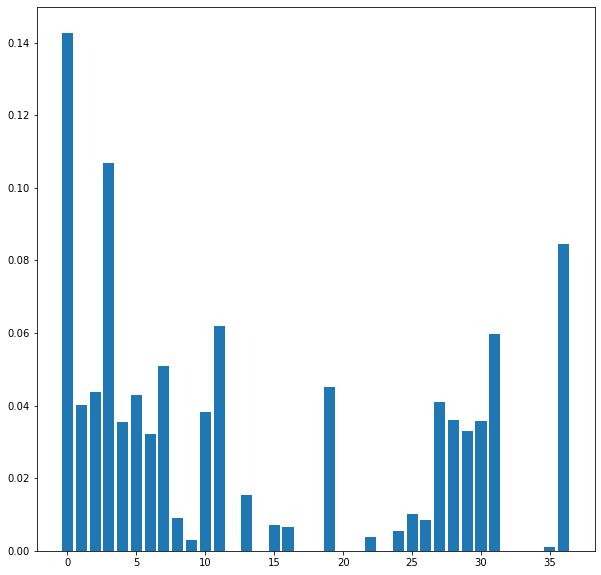

In [192]:
feature_importance=best_model.feature_importances_
df=pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train_DT.columns)
print(df.sort_values(by=["Imp"],ascending=False))
# plot feature importance
plt.figure(figsize=(10,10))
plt.bar([x for x in range(len(feature_importance))], feature_importance)
plt.show()

# Naive Bayes

In [193]:
from sklearn.model_selection import train_test_split
X_train_NB, X_test_NB, y_train_NB, y_test_NB = train_test_split(X, y, test_size=0.30 , random_state=1)

In [194]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [195]:
NB_model = GaussianNB()
NB_model.fit(X_train_NB, y_train_NB)

GaussianNB()

In [196]:
sm = SMOTE(random_state=2)
X_train_res_NB, y_train_res_NB = sm.fit_resample(X_train_NB, y_train_NB.ravel())

## Performance Metrices

### Train Data

In [197]:
y_train_predict_NB = NB_model.predict(X_train_res_NB)
model_score_NB = NB_model.score(X_train_res_NB, y_train_res_NB)
print(model_score_NB)

0.6274680603948897


### Test Data

In [198]:
y_test_predict_NB = NB_model.predict(X_test_NB)
model_score_NB = NB_model.score(X_test_NB, y_test_NB)
print(model_score_NB)

0.800910125142207


In [199]:
print('Train Data')
print(metrics.confusion_matrix(y_train_res_NB, y_train_predict_NB))
print(metrics.classification_report(y_train_res_NB, y_train_predict_NB))

print('Test Data')
print(metrics.confusion_matrix(y_test_NB, y_test_predict_NB))
print(metrics.classification_report(y_test_NB, y_test_predict_NB))

Train Data
[[ 689 1033]
 [ 250 1472]]
              precision    recall  f1-score   support

           0       0.73      0.40      0.52      1722
           1       0.59      0.85      0.70      1722

    accuracy                           0.63      3444
   macro avg       0.66      0.63      0.61      3444
weighted avg       0.66      0.63      0.61      3444

Test Data
[[ 61  83]
 [ 92 643]]
              precision    recall  f1-score   support

           0       0.40      0.42      0.41       144
           1       0.89      0.87      0.88       735

    accuracy                           0.80       879
   macro avg       0.64      0.65      0.65       879
weighted avg       0.81      0.80      0.80       879



## Train Metrics

In [200]:
NB_metrics=classification_report(y_train_res_NB, y_train_predict_NB,output_dict=True)
df=pd.DataFrame(NB_metrics).transpose()
NB_train_precision=round(df.loc["1"][0],2)
NB_train_recall=round(df.loc["1"][1],2)
NB_train_f1=round(df.loc["1"][2],2)
print ('NB_train_precision ',NB_train_precision)
print ('NB_train_recall ',NB_train_recall)
print ('NB_train_f1 ',NB_train_f1)

NB_train_precision  0.59
NB_train_recall  0.85
NB_train_f1  0.7


## Test Metrics

In [201]:
NB_metrics=classification_report(y_test_NB, y_test_predict_NB,output_dict=True)
df=pd.DataFrame(NB_metrics).transpose()
NB_test_precision=round(df.loc["1"][0],2)
NB_test_recall=round(df.loc["1"][1],2)
NB_test_f1=round(df.loc["1"][2],2)
print ('NB_test_precision ',NB_test_precision)
print ('NB_test_recall ',NB_test_recall)
print ('NB_test_f1 ',NB_test_f1)

NB_test_precision  0.89
NB_test_recall  0.87
NB_test_f1  0.88


AUC: 0.702


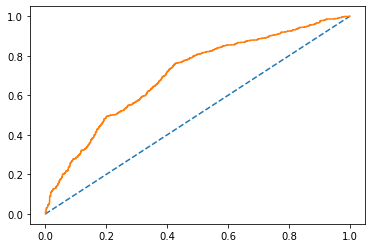

In [202]:
# predict probabilities
probs = NB_model.predict_proba(X_train_res_NB)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc_NB = roc_auc_score(y_train_res_NB, probs)
print('AUC: %.3f' % train_auc_NB)
# calculate roc curve
train_fpr_NB, train_tpr_NB, train_thresholds = roc_curve(y_train_res_NB, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_NB, train_tpr_NB);

AUC: 0.716


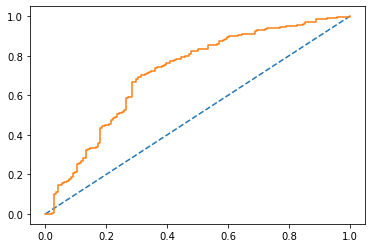

In [203]:
# predict probabilities
probs = NB_model.predict_proba(X_test_NB)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc_NB = roc_auc_score(y_test_NB, probs)
print('AUC: %.3f' % test_auc_NB)
# calculate roc curve
test_fpr_NB, test_tpr_NB, test_thresholds = roc_curve(y_test_NB, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_NB, test_tpr_NB);

# Random Forest

In [204]:
from sklearn.model_selection import train_test_split
X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(X, y, test_size=0.30 , random_state=1)

In [205]:
from sklearn.ensemble import RandomForestClassifier  
RF_model= RandomForestClassifier(n_estimators= 100,oob_score=True)

In [206]:
sm = SMOTE(random_state=2)
X_train_res_RF, y_train_res_RF = sm.fit_resample(X_train_RF, y_train_RF.ravel())

In [248]:
RF_model.fit(X_train_res_RF, y_train_res_RF) 

RandomForestClassifier(oob_score=True)

In [249]:
print(RF_model.oob_score_)

0.9738675958188153


In [208]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train_res_RF)
model_score =RF_model.score(X_train_res_RF, y_train_res_RF)
print(model_score)
print(metrics.confusion_matrix(y_train_res_RF, y_train_predict))
print(metrics.classification_report(y_train_res_RF, y_train_predict))

1.0
[[1722    0]
 [   0 1722]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1722
           1       1.00      1.00      1.00      1722

    accuracy                           1.00      3444
   macro avg       1.00      1.00      1.00      3444
weighted avg       1.00      1.00      1.00      3444



In [209]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test_RF)
model_score = RF_model.score(X_test_RF, y_test_RF)
print(model_score)
print(metrics.confusion_matrix(y_test_RF, y_test_predict))
print(metrics.classification_report(y_test_RF, y_test_predict))

0.9510807736063709
[[109  35]
 [  8 727]]
              precision    recall  f1-score   support

           0       0.93      0.76      0.84       144
           1       0.95      0.99      0.97       735

    accuracy                           0.95       879
   macro avg       0.94      0.87      0.90       879
weighted avg       0.95      0.95      0.95       879



## Train Metrics Before Tuning

In [210]:
RF_metrics=classification_report(y_train_res_RF, y_train_predict,output_dict=True)
df=pd.DataFrame(RF_metrics).transpose()
RF_train_precision_BT=round(df.loc["1"][0],2)
RF_train_recall_BT=round(df.loc["1"][1],2)
RF_train_f1_BT=round(df.loc["1"][2],2)
print ('RF_train_precision Before Model Tuning',RF_train_precision_BT)
print ('RF_train_recall Before Model Tuning',RF_train_recall_BT)
print ('RF_train_f1 Before Model Tuning ',RF_train_f1_BT)

RF_train_precision Before Model Tuning 1.0
RF_train_recall Before Model Tuning 1.0
RF_train_f1 Before Model Tuning  1.0


## Test Metrics Before Tuning

In [211]:
RF_metrics=classification_report(y_test_RF, y_test_predict,output_dict=True)
df=pd.DataFrame(RF_metrics).transpose()
RF_test_precision_BT=round(df.loc["1"][0],2)
RF_test_recall_BT=round(df.loc["1"][1],2)
RF_test_f1_BT=round(df.loc["1"][2],2)
print ('RF_test_precision Before Tuning',RF_test_precision_BT)
print ('RF_test_recall Before Tuning ',RF_test_recall_BT)
print ('RF_test_f1 Before Tuning',RF_test_f1_BT)

RF_test_precision Before Tuning 0.95
RF_test_recall Before Tuning  0.99
RF_test_f1 Before Tuning 0.97


AUC: 1.000


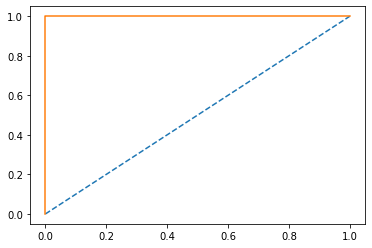

In [232]:
# predict probabilities
probs = RF_model.predict_proba(X_train_res_RF)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc_RF = roc_auc_score(y_train_res_RF, probs)
print('AUC: %.3f' % train_auc_RF)
# calculate roc curve
train_fpr_RF, train_tpr_RF, train_thresholds = roc_curve(y_train_res_RF, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_RF, train_tpr_RF);

AUC: 0.985


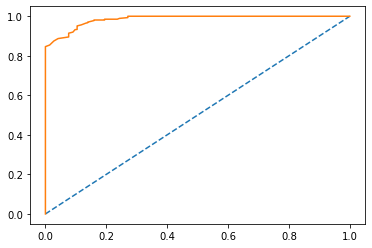

In [233]:
# predict probabilities
probs = RF_model.predict_proba(X_test_RF)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc_RF= roc_auc_score(y_test_RF, probs)
print('AUC: %.3f' % test_auc_RF)
# calculate roc curve
test_fpr_RF, test_tpr_RF, test_thresholds = roc_curve(y_test_RF, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_RF, test_tpr_RF);

## Model Tuning

In [216]:
from sklearn.model_selection import GridSearchCV

In [217]:
param_grid={
            'max_depth': [10,15,20,25,30],
            'min_samples_leaf': [5, 15,30],
            'min_samples_split': [15,30,35,40,50],
            'n_estimators': [100,150]
          }

In [218]:
grid_search=GridSearchCV(estimator=RF_model,param_grid=param_grid,cv=3)
grid_search.fit(X_train_res_RF,y_train_res_RF)

GridSearchCV(cv=3, estimator=RandomForestClassifier(oob_score=True),
             param_grid={'max_depth': [10, 15, 20, 25, 30],
                         'min_samples_leaf': [5, 15, 30],
                         'min_samples_split': [15, 30, 35, 40, 50],
                         'n_estimators': [100, 150]})

In [219]:
grid_search.best_params_

{'max_depth': 30,
 'min_samples_leaf': 5,
 'min_samples_split': 15,
 'n_estimators': 150}

In [220]:
best_model=grid_search.best_estimator_

In [221]:
## Performance Matrix on train data set
ytrain_predict = best_model.predict(X_train_res_RF)
model_score =best_model.score(X_train_res_RF, y_train_res_RF)
print(model_score)
print(metrics.confusion_matrix(y_train_res_RF, ytrain_predict))
print(metrics.classification_report(y_train_res_RF, ytrain_predict))

0.9831591173054588
[[1669   53]
 [   5 1717]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1722
           1       0.97      1.00      0.98      1722

    accuracy                           0.98      3444
   macro avg       0.98      0.98      0.98      3444
weighted avg       0.98      0.98      0.98      3444



In [222]:
## Performance Matrix on test data set
ytest_predict = best_model.predict(X_test_RF)
model_score = best_model.score(X_test_RF, y_test_RF)
print(model_score)
print(metrics.confusion_matrix(y_test_RF, ytest_predict))
print(metrics.classification_report(y_test_RF, ytest_predict))

0.9044368600682594
[[ 75  69]
 [ 15 720]]
              precision    recall  f1-score   support

           0       0.83      0.52      0.64       144
           1       0.91      0.98      0.94       735

    accuracy                           0.90       879
   macro avg       0.87      0.75      0.79       879
weighted avg       0.90      0.90      0.90       879



## Train Metrics After Model Tuning

In [223]:
RF_metrics=classification_report(y_train_res_RF, ytrain_predict,output_dict=True)
df=pd.DataFrame(RF_metrics).transpose()
RF_train_precision_AT=round(df.loc["1"][0],2)
RF_train_recall_AT=round(df.loc["1"][1],2)
RF_train_f1_AT=round(df.loc["1"][2],2)
print ('RF_train_precision After Model Tuning ',RF_train_precision_AT)
print ('RF_train_recall  After Model Tuning ',RF_train_recall_AT)
print ('RF_train_f1  After Model Tuning',RF_train_f1_AT)

RF_train_precision After Model Tuning  0.97
RF_train_recall  After Model Tuning  1.0
RF_train_f1  After Model Tuning 0.98


## Test Metrics After Model Tuning

In [224]:
RF_metrics=classification_report(y_test_RF, ytest_predict,output_dict=True)
df=pd.DataFrame(RF_metrics).transpose()
RF_test_precision_AT=round(df.loc["1"][0],2)
RF_test_recall_AT=round(df.loc["1"][1],2)
RF_test_f1_AT=round(df.loc["1"][2],2)
print ('RF_test_precision  After Model Tuning',RF_test_precision_AT)
print ('RF_test_recall  After Model Tuning',RF_test_recall_AT)
print ('RF_test_f1  After Model Tuning ',RF_test_f1_AT)

RF_test_precision  After Model Tuning 0.91
RF_test_recall  After Model Tuning 0.98
RF_test_f1  After Model Tuning  0.94


AUC: 0.999


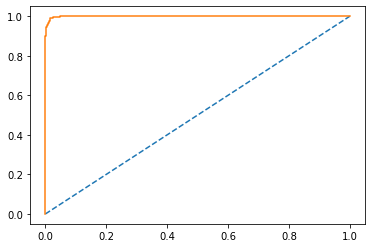

In [242]:
# predict probabilities
probs = best_model.predict_proba(X_train_res_RF)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc_RF_AT = roc_auc_score(y_train_res_RF, probs)
print('AUC: %.3f' % train_auc_RF_AT)
# calculate roc curve
train_fpr_RF_AT, train_tpr_RF_AT, train_thresholds = roc_curve(y_train_res_RF, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_RF_AT, train_tpr_RF_AT);

AUC: 0.942


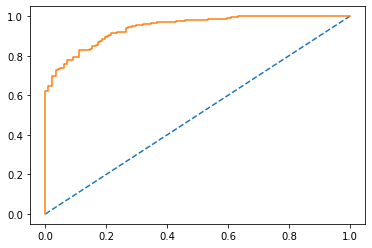

In [243]:
# predict probabilities
probs = best_model.predict_proba(X_test_RF)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc_RF_AT = roc_auc_score(y_test_RF, probs)
print('AUC: %.3f' % test_auc_RF_AT)
# calculate roc curve
test_fpr_RF_AT, test_tpr_RF_AT, test_thresholds = roc_curve(y_test_RF, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_RF_AT, test_tpr_RF_AT);

## Feature Importance

                                     Imp
Audience_number                 0.087146
All_rounder_in_team             0.082105
sil_width                       0.073380
extra_bowls_opponent            0.072054
Avg_team_Age                    0.070792
Extra_bowls_bowled              0.066294
Min_run_scored_1over            0.059451
Bowlers_in_team                 0.048094
Min_run_given_1over             0.043505
player_highest_run              0.042986
Max_wicket_taken_1over          0.032070
Season_Winter                   0.031439
Max_run_scored_1over            0.031244
Max_run_given_1over             0.029777
Players_scored_zero_3           0.028085
Opponent_Kenya                  0.025991
Players_scored_zero_2           0.022230
Players_scored_zero_4           0.020300
player_highest_wicket_2         0.018174
Offshore_Yes                    0.017611
Match_light_type_Night          0.012645
Clus_kmeans                     0.011181
Opponent_England                0.011106
First_selection_

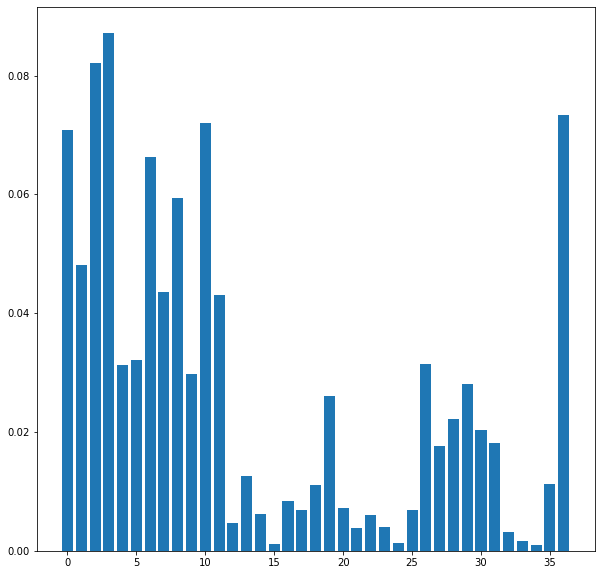

In [227]:
feature_importance=best_model.feature_importances_
df=pd.DataFrame(best_model.feature_importances_, columns = ["Imp"],index= X.columns)
print(df.sort_values(by=["Imp"],ascending=False))

# plot feature importance
plt.figure(figsize=(10,10))
plt.bar([x for x in range(len(feature_importance))], feature_importance)
plt.show()

# Model Comparison

## Before Tuning

In [234]:
index=['AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Logistic Regression Train':[train_auc_LR,LR_train_recall_BT,LR_train_precision_BT,LR_train_f1_BT],
        'Logistic Regression Test':[test_auc_LR,LR_test_recall_BT,LR_test_precision_BT,LR_test_f1_BT],
       'Decision Tree Train':[train_auc_DT,DT_train_recall_BT,DT_train_precision_BT,DT_train_f1_BT],
        'Decision Tree  Test':[test_auc_DT,DT_test_recall_BT,DT_test_precision_BT,DT_test_f1_BT],
        'NB Train':[train_auc_NB,NB_train_recall,NB_train_precision,NB_train_f1],
        'NB Test':[test_auc_NB,NB_test_recall,NB_test_precision,NB_test_f1],
        'Random Forest Train':[train_auc_RF,RF_train_recall_BT,RF_train_precision_BT,RF_train_f1_BT],
        'Random Forest Test':[test_auc_RF,RF_test_recall_BT,RF_test_precision_BT,RF_test_f1_BT]},
        index=index)
round(data,2)

,Logistic Regression Train,Logistic Regression Test,Decision Tree Train,Decision Tree Test,NB Train,NB Test,Random Forest Train,Random Forest Test
AUC,0.94,0.86,1.0,0.87,0.70,0.72,1.0,0.98
Recall,0.90,0.91,1.0,0.93,0.85,0.87,1.0,0.99
Precision,0.86,0.93,1.0,0.96,0.59,0.89,1.0,0.95
F1 Score,0.88,0.92,1.0,0.95,0.70,0.88,1.0,0.97


## After Tuning

In [238]:
index=['AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Logistic Regression Train':[train_auc_LR_AT,LR_train_recall_AT,LR_train_precision_AT,LR_train_f1_AT],
        'Logistic Regression Test':[test_auc_LR_AT,LR_test_recall_AT,LR_test_precision_AT,LR_test_f1_AT],
       'Decision Tree Train':[train_auc_DT_AT,DT_train_recall_AT,DT_train_precision_AT,DT_train_f1_AT],
        'Decision Tree  Test':[test_auc_DT_AT,DT_test_recall_AT,DT_test_precision_AT,DT_test_f1_AT],
        'NB Train':[train_auc_NB,NB_train_recall,NB_train_precision,NB_train_f1],
        'NB Test':[test_auc_NB,NB_test_recall,NB_test_precision,NB_test_f1],
        'Random Forest Train':[train_auc_RF_AT,RF_train_recall_AT,RF_train_precision_AT,RF_train_f1_AT],
        'Random Forest Test':[test_auc_RF_AT,RF_test_recall_AT,RF_test_precision_AT,RF_test_f1_AT]},
        index=index)
round(data,2)

,Logistic Regression Train,Logistic Regression Test,Decision Tree Train,Decision Tree Test,NB Train,NB Test,Random Forest Train,Random Forest Test
AUC,0.65,0.66,0.99,0.87,0.70,0.72,1.00,0.94
Recall,1.00,1.00,0.94,0.90,0.85,0.87,1.00,0.98
Precision,0.50,0.84,0.94,0.92,0.59,0.89,0.97,0.91
F1 Score,0.67,0.91,0.94,0.91,0.70,0.88,0.98,0.94


## Before Model Tuning

## Train Data

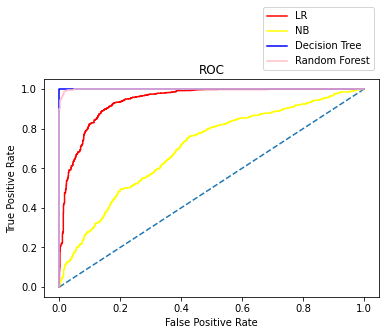

In [239]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr_LR, train_tpr_LR,color='red',label="LR")
plt.plot(train_fpr_NB,train_tpr_NB,color='yellow',label="NB")
plt.plot(train_fpr_DT,train_tpr_DT,color='blue',label="Decision Tree")
plt.plot(train_fpr_RF,train_tpr_RF,color='pink',label="Random Forest")
 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

## Test Data

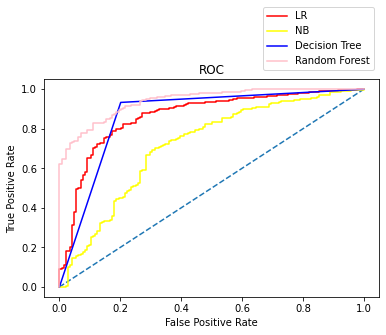

In [245]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr_LR, test_tpr_LR,color='red',label="LR")
plt.plot(test_fpr_NB,test_tpr_NB,color='yellow',label="NB")
plt.plot(test_fpr_DT,test_tpr_DT,color='blue',label="Decision Tree")
plt.plot(test_fpr_RF,test_tpr_RF,color='pink',label="Random Forest")
 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

## After Tuning

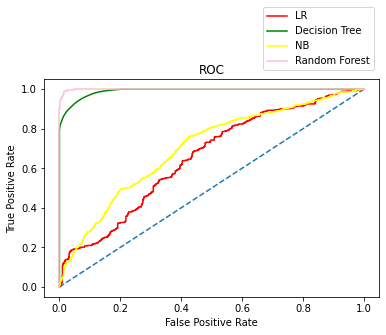

In [244]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr_LR_AT, train_tpr_LR_AT,color='red',label="LR")
plt.plot(train_fpr_DT_AT,train_tpr_DT_AT,color='green',label="Decision Tree")
plt.plot(train_fpr_NB,train_tpr_NB,color='yellow',label="NB")
plt.plot(train_fpr_RF_AT,train_tpr_RF_AT,color='pink',label="Random Forest")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

## Test Data

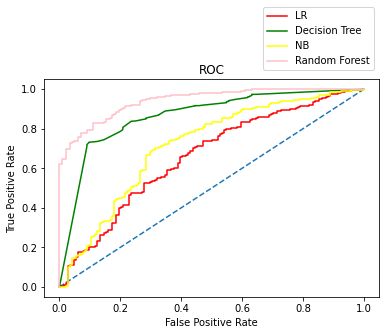

In [246]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr_LR_AT, test_tpr_LR_AT,color='red',label="LR")
plt.plot(test_fpr_DT_AT,test_tpr_DT_AT,color='green',label="Decision Tree")
plt.plot(test_fpr_NB,test_tpr_NB,color='yellow',label="NB")
plt.plot(test_fpr_RF_AT,test_tpr_RF_AT,color='pink',label="Random Forest")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')